## A11535519 - Justin Laughlin
### MAE 290A: Homework 1 (10/19/17)
### Problem 1

In [1]:
# Import necessary packages & configure settings
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Bernoulli Shift Series: $$x_{n+1} = \text{mod}(\alpha x_n, 1)$$
where $\alpha>1$

Consider the case $\boxed{\alpha = 2}$ with initial condition $\boxed{x_0 = 0.1}$

First, let us find the analytical expression for this series. Begin by calculating the first several terms

$$x = \{0.1, 0.2, 0.4, 0.8, 0.6, 0.2, 0.4, 0.8, 0.6, 0.2, ... \}$$

The analytical values of the series follow a pattern which we will construct into a numpy array:

In [2]:
# Initialize parameters
alpha = 2
x0 = 0.1

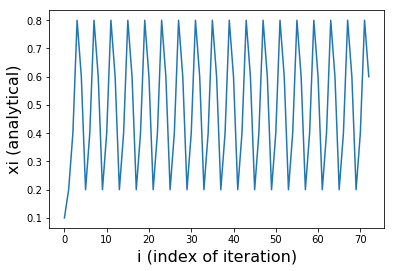

In [3]:
# Analytical values of series
xa = np.concatenate((np.array([0.1]),np.tile([0.2, 0.4, 0.8, 0.6],18)),axis=0)

# Plot first analytical values of series
plt.plot(xa)
plt.xlabel('i (index of iteration)', fontsize=16)
plt.ylabel('xi (analytical)', fontsize=16)

Now we will calculate the values of the series numerically using double precision:

In [4]:
# initialize
niter = len(xa) # number of iterations
x = np.double(np.zeros([niter,]))
x[0] = x0

# Calculate numerical values of series (using double precision)
for i in range(0,niter-1):
    x[i+1] = np.mod(alpha*x[i],1)

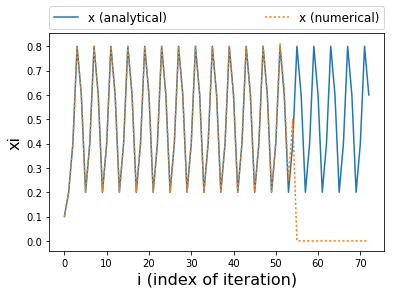

In [5]:
# Plot numerical series overlayed with analytical series
plt.plot(xa, linestyle='-', label="x (analytical)")
plt.plot(x, linestyle=':', label="x (numerical)")
plt.xlabel('i (index of iteration)', fontsize=16)
plt.ylabel('xi', fontsize=16)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0., fontsize=12)

Now, let's look at the absolute difference between the analytical and numerical series for x


In [6]:
xdiff = np.abs(xa-x)
print('First 10 values of xdiff\n')
print(xdiff[0:10])

First 10 values of xdiff

[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.11022302e-16   1.66533454e-16   3.33066907e-16   6.66133815e-16
   1.44328993e-15   2.83106871e-15]


The assignment does not give a clear definition of divergence; if divergence is liberally defined as any amount of difference between the numerical and analytical series than the series diverges at $i=0$, as a computer cannot store the number $x_0 = 0.1$ to an infinite precision. I believe the problem is looking for stricter definition of divergence (i.e. a visible difference between the two series on a plot). From observing the figure above, one can see that somewhere between $i=50$ and $i=60$ the two series "diverge". For the sake of obtaining a particular index I will define two series as "divergent" when the difference between the series is above $0.01$, i.e.

$$|x_a-x_n| \geq 0.01$$

In [7]:
# Find first value where xdiff>=0.01
divergenceIdx = np.argmax(xdiff>=0.01)
print("The index where the numerical and analytical values of x are >=0.1 from each other is: ",divergenceIdx)
print("Indices 49-53 of xdiff: ",xdiff[49:54])

The index where the numerical and analytical values of x are >=0.1 from each other is:  51
Indices 49-53 of xdiff:  [ 0.003125  0.00625   0.0125    0.025     0.05    ]


From looking at the values, it seems as if the error approximately doubles upon each iteration. Let us plot $\text{log}_2(x_{diff})$ against the iteration index, $i$ (note: we truncate $x_{diff}$ as it is $0$ for $i \in [0,4)$ which cannot be an argument for $\text{log}_2$).

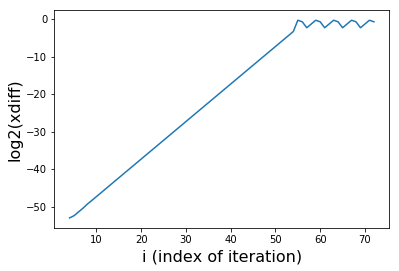

In [8]:
xdifflog2 = np.log2(xdiff[4:])
plt.plot(np.arange(4,niter),xdifflog2)
plt.xlabel('i (index of iteration)', fontsize=16)
plt.ylabel('log2(xdiff)', fontsize=16)

Up until the point where the error levels out, the resulting relationship is almost perfectly linear! Thus we can estimate that the round-off error approximately doubles at each step (beginning close to $1.0 \times 10^{-16}$ at $i=4$). If we wanted an analyitical equation for this we could express the round-off error as:

$$E_{i} \approx (1.0 \times 10^{-16}) \cdot 2^{i-4}$$

Now, using this result we would like to estimate at which iteration the single precision numerical series would diverge. The error should be similar to the above equation in the sense that it doubles with each iteration, but the errors would begin at a larger value than $1.0 \times 10^{-16}$. We must first find the machine error for singles in python:

In [9]:
print("Machine error for singles:",np.finfo(np.float32).eps)

Machine error for singles: 1.19209e-07


We can assume the errors for this series when using single precision numbers can be approximated by

$$E_{i,single} \approx (1.19 \times 10^{-7}) \cdot 2^{i-4}$$

Now we solve for $i$ when $E_{i,single} = 0.01$ (ie our divergence criterion)

In [10]:
print("Estimated iteration of divergence using single precision: ",np.ceil(np.log2(0.01 / (1.19 * 10**-7)) + 4))

Estimated iteration of divergence using single precision:  21.0


Thus it is estimated that the single precision numerical series will "diverge" at $i=21$

Let's validate our double precision error equation to make sure our answer is sensible:

In [11]:
print("Estimated iteration of divergence using single precision: ",np.ceil(np.log2(0.01 / (1.0 * 10**-16)) + 4))

Estimated iteration of divergence using single precision:  51.0


Which is the same answer we obtained earlier...